# Tobigs 22기 3주차 정규세션 Ensemble 과제

# 과제1. High variance/bias

개념참조영상 : https://www.youtube.com/watch?v=EuBBz3bI-aA

## Q1. High variance의 정의 및 문제점에 대해 설명해주세요.

High variance는 모델이 훈련 데이터에 Overfitting, 이로 인해 새로운 데이터(테스트 데이터)에 대해 성능이 떨어지는 상황을 의미

## Q2. High bias의 정의 및 문제점에 대해 설명해주세요.

High bias는 모델이 너무 단순하여 훈련 데이터와 테스트 데이터 모두에서 충분한 패턴을 학습하지 못하는 상황이며, Underfitting 상황이 발생하여 복잡한 데이터를 파악하지 못한다.

## Q3. High variance 와 high bias를 다룰때 적합한 ensemble 방식과 그 이유를 적어주세요.

- High variance problem : Random Forest 방식을 사용하면 Overfitting을 줄일 수 있다. 모델의 다양성이 커지고 투표를 통해서 과적합을 줄일 수 있다. 


- High bias problem : 여러 개의 learners를 순차적으로 학습시켜서, 이전 모델이 잘못 예측한 사례에 가중치를 부여하여 성능을 향상시키는 방법인 Boosting 기법이 좋다.

# 과제2. Ensemble 실습

데이터 출처: https://www.kaggle.com/sakshigoyal7/credit-card-customers

## 목표 : 은행 신용 카드 서비스 이탈 고객 예측 모델 만들기!

### 칼럼 설명
```
[features]
 - Customer_Age : 고객의 나이
 - Gender : 성별 (M=Male, F=Female)
 - Dependent_count : 부양하는 가족의 수
 - Education_Level : 고객의 최종 학력 (example: high school, college graduate, etc.)
 - Marital_Status : 결혼 상태 (Married, Single, Divorced, Unknown)
 - Income_Category : 소득 범주 (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, etc.)
 - Card_Category : 카드 종류 (Blue, Silver, Gold, Platinum)
 - Months_on_book : 은행과의 관계 기간 (개월 수)
 - Total_Relationship_Count : 고객이 보유한 전체 제품 수
 - Months_Inactive_12_mon : 최근 12개월 동안 비활성화된 개월 수
 - Contacts_Count_12_mon : 최근 12개월 동안의 연락 횟수
 - Credit_Limit : 신용 카드의 신용 한도
 - Total_Revolving_Bal : 신용 카드의 총 회전 잔액
 - Avg_Open_To_Buy : 구매 가능 신용 한도 (최근 12개월 평균)
 - Total_Amt_Chng_Q4_Q1 : 거래 금액 변화율 (4분기 대비 1분기)
 - Total_Trans_Amt :  총 거래 금액 (지난 12개월)
 - Total_Trans_Ct : 총 거래 횟수 (지난 12개월)
 - Total_Ct_Chng_Q4_Q1 : 거래 횟수 변화율 (4분기 대비 1분기)
 - Avg_Utilization_Ratio : 평균 카드 이용 비율

[target]
 - Attrition_Flag : 고객 활동 변수 / Existing Customer - 0, Attrited Customer - 1

```


In [1]:
import pandas as pd

# 🐻‍❄️데이터의 경로는 변경해주세요
df = pd.read_csv('BankChurners.csv')

# Feature 21 & 22의 경우 데이터 셋에서 삭제하는 것을 추천하는 문구 발견, 삭제
print(len(df.columns))
df.drop(df.columns[[21, 22]], axis = 1, inplace = True) # inplace = True 데이터 원본에서 처리 not copy
print(len(df.columns))

23
21


In [2]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

## EDA & Preprocessing

EDA를 통해 인사이트를 얻고 전처리를 진행해주세요.

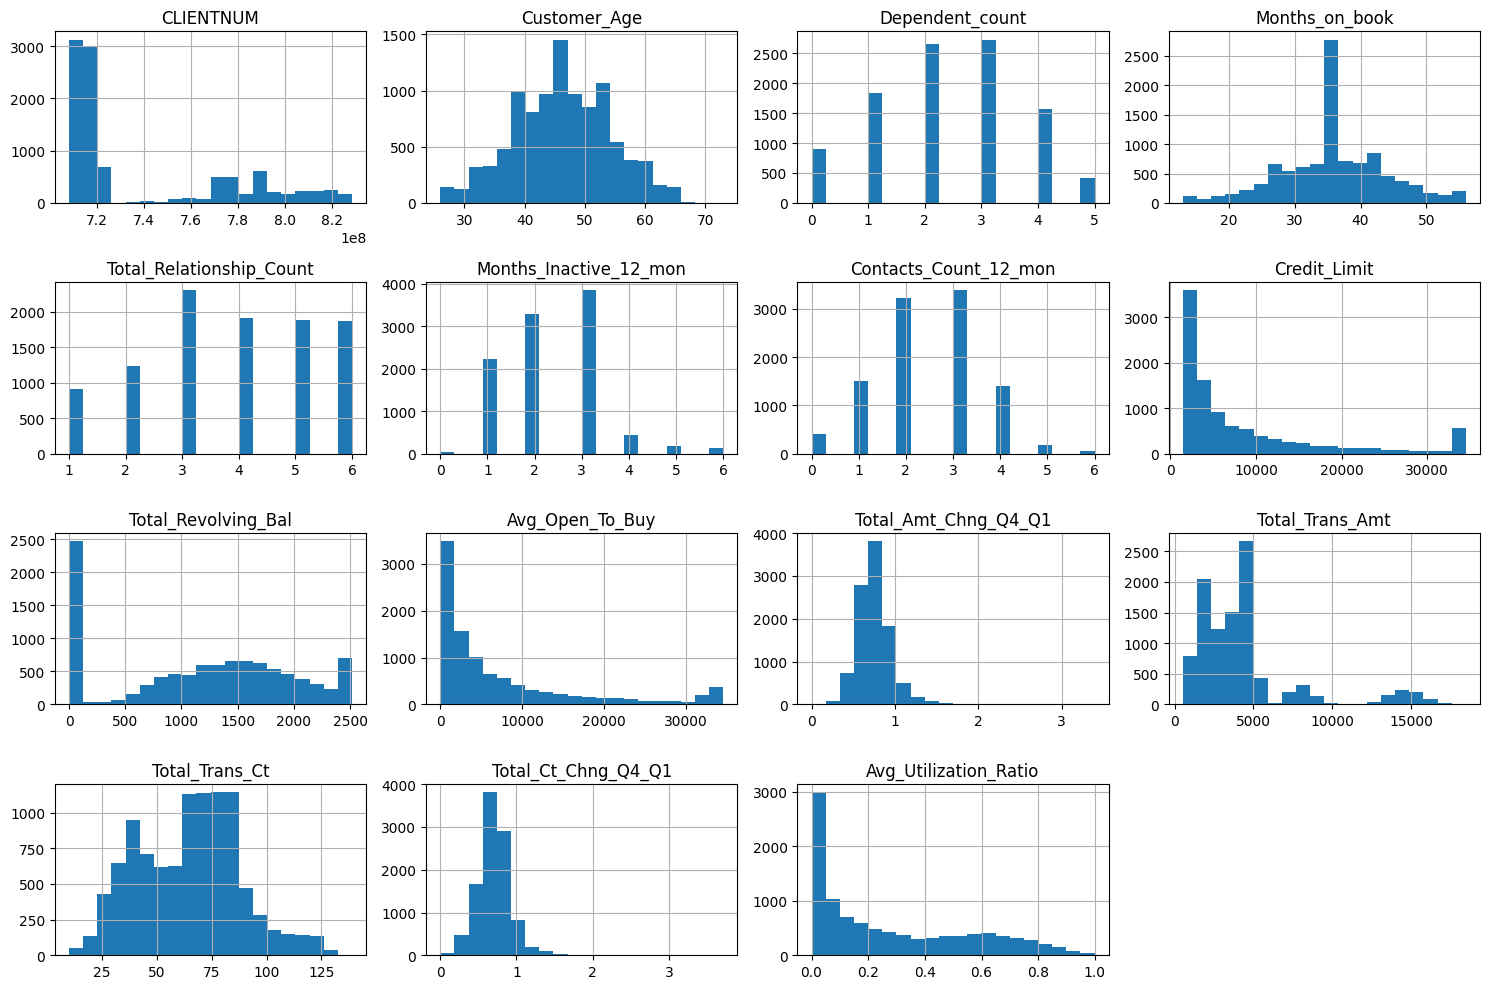

In [4]:
# 1. 기초 통계 확인
summary_stats = df.describe()

# 2. 범주형 변수 탐색
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_summary = df[categorical_columns].describe()

# 3. 수치형 변수 분포 탐색 (히스토그램 생성)
import matplotlib.pyplot as plt

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_columns].hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

## Modeling

다음 4가지 모델의 성능을 비교해주세요.
- Decision Tree
- Random Forest
- Adaboost
- Gradientboosting
- 이외 다른 ensemble 모델을 사용하셔도 됩니다!


In [5]:
from pycaret.classification import *

In [6]:
setup_clf = setup(data=df, target="Attrition_Flag", train_size=0.7, session_id=333, fold_shuffle=True)

,Description,Value
0,Session id,333
1,Target,Attrition_Flag
2,Target type,Binary
3,Target mapping,"Attrited Customer: 0, Existing Customer: 1"
4,Original data shape,"(10127, 21)"
5,Transformed data shape,"(10127, 38)"
6,Transformed train set shape,"(7088, 38)"
7,Transformed test set shape,"(3039, 38)"
8,Numeric features,15
9,Categorical features,5


In [10]:
model = compare_models(n_select=5)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,12:07:20
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9694,0.9936,0.9694,0.9691,0.9691,0.8841,0.8847,0.2770
gbc,Gradient Boosting Classifier,0.9636,0.9896,0.9636,0.9631,0.9628,0.8591,0.8611,0.3520
ada,Ada Boost Classifier,0.9551,0.9838,0.9551,0.9545,0.9547,0.8304,0.8309,0.0950
rf,Random Forest Classifier,0.9549,0.9853,0.9549,0.9541,0.9532,0.8212,0.8255,0.1360
dt,Decision Tree Classifier,0.9354,0.8806,0.9354,0.9356,0.9354,0.7608,0.7610,0.0260
et,Extra Trees Classifier,0.9261,0.9724,0.9261,0.9251,0.9197,0.6826,0.7023,0.0920
lda,Linear Discriminant Analysis,0.9024,0.9189,0.9024,0.8972,0.8983,0.6092,0.6140,0.0210
qda,Quadratic Discriminant Analysis,0.8990,0.9232,0.8990,0.8956,0.8964,0.6074,0.6102,0.0200
ridge,Ridge Classifier,0.8960,0.9190,0.8960,0.8906,0.8829,0.5277,0.5600,0.0190
lr,Logistic Regression,0.8394,0.7408,0.8394,0.7206,0.7663,0.0015,0.0086,0.0360


# 다음 4가지 모델의 성능을 비교해주세요.
- Decision Tree : 0.9354
- Random Forest : 0.9549
- Adaboost : 0.9551
- Gradientboosting : 0.9636

# 분석
- 전처리하지 않은 데이터는 약 평균적으로 0.95 정도의 Acc를 달성한다.



In [11]:
tuned_model = [tune_model(i) for i in model[1:]]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9704,0.9933,0.9704,0.9700,0.9700,0.8875,0.8881
1,0.9605,0.9920,0.9605,0.9599,0.9593,0.8449,0.8482
2,0.9661,0.9915,0.9661,0.9657,0.9654,0.8690,0.8709
3,0.9704,0.9964,0.9704,0.9700,0.9699,0.8866,0.8877
4,0.9661,0.9872,0.9661,0.9658,0.9652,0.8680,0.8706
5,0.9676,0.9871,0.9676,0.9676,0.9665,0.8721,0.8760
6,0.9633,0.9885,0.9633,0.9635,0.9619,0.8537,0.8592
7,0.9718,0.9925,0.9718,0.9714,0.9715,0.8932,0.8937
8,0.9689,0.9919,0.9689,0.9689,0.9679,0.8771,0.8806


Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9464,0.9836,0.9464,0.9451,0.9454,0.7941,0.7953
1,0.9492,0.9748,0.9492,0.9479,0.9476,0.8005,0.8037
2,0.9563,0.9805,0.9563,0.9555,0.9548,0.8276,0.8313
3,0.9591,0.9909,0.9591,0.9583,0.9582,0.8423,0.8438
4,0.9436,0.9796,0.9436,0.9426,0.9406,0.7697,0.7785
5,0.9535,0.9754,0.9535,0.9524,0.9527,0.8218,0.8228
6,0.9492,0.9761,0.9492,0.9479,0.9479,0.8020,0.8044
7,0.9506,0.9876,0.9506,0.9494,0.9492,0.8068,0.8096
8,0.9562,0.9861,0.9562,0.9553,0.9549,0.8275,0.8304


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9563,0.9878,0.9563,0.9604,0.9575,0.8472,0.8502
1,0.9450,0.9834,0.9450,0.9490,0.9463,0.8065,0.8087
2,0.9436,0.9871,0.9436,0.9494,0.9454,0.8048,0.8087
3,0.9450,0.9898,0.9450,0.9504,0.9467,0.8090,0.8126
4,0.9591,0.9856,0.9591,0.9604,0.9596,0.8521,0.8527
5,0.9506,0.9821,0.9506,0.9526,0.9514,0.8227,0.8236
6,0.9394,0.9817,0.9394,0.9436,0.9408,0.7866,0.7888
7,0.9563,0.9856,0.9563,0.9586,0.9571,0.8441,0.8454
8,0.9562,0.9830,0.9562,0.9576,0.9567,0.8408,0.8413


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9450,0.9549,0.9450,0.9435,0.9439,0.7879,0.7893
1,0.9436,0.9440,0.9436,0.9423,0.9427,0.7848,0.7856
2,0.9436,0.9486,0.9436,0.9426,0.9430,0.7864,0.7868
3,0.9379,0.9485,0.9379,0.9389,0.9384,0.7733,0.7734
4,0.9422,0.9474,0.9422,0.9404,0.9407,0.7754,0.7773
5,0.9394,0.9200,0.9394,0.9378,0.9383,0.7679,0.7688
6,0.9394,0.9412,0.9394,0.9381,0.9386,0.7695,0.7701
7,0.9535,0.9614,0.9535,0.9533,0.9534,0.8269,0.8269
8,0.9506,0.9434,0.9506,0.9494,0.9497,0.8096,0.8106


Fitting 10 folds for each of 10 candidates, totalling 100 fits


# 하이퍼 파라미터 튜닝

튜닝을 통해 Accurac를 높일 수 있었다.